In [1]:
## Time series ASc under MW perturbations

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', **{'size':25})
rc('text', usetex=False)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

In [5]:
session=cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

In [6]:
from dask.distributed import Client
import dask

c=Client(local_directory = '/g/data/v45/qo9901/') 
c 

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43937/status,
Dashboard: /proxy/43937/status,Workers: 2
Total threads: 2,Total memory: 9.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35501,Workers: 2
Dashboard: /proxy/43937/status,Total threads: 2
Started: Just now,Total memory: 9.00 GiB
Comm: tcp://127.0.0.1:38803,Total threads: 1
Dashboard: /proxy/40293/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:37479,


In [ ]:
import dask.config
from dask.distributed import Client,LocalCluster
from dask_jobqueue import PBSCluster

walltime = '01:00:00'
cores = 28
memory = '252GB'

cluster = PBSCluster(walltime=str(walltime), cores=cores, memory=str(memory),processes=cores,
                     job_extra=['-q normalbw','-P v45','-l ncpus='+str(cores),'-l mem='+str(memory),
                                '-l storage=gdata/ik11+gdata/e14+gdata/hh5+gdata/v45+gdata/cj50',
                                '-l jobfs=400GB'],
                     local_directory='$TMPDIR',
                     header_skip=["select"],
                     #python=os.environ["DASK_PYTHON"]
                    )
cluster

# and if you want even more power, you can use this to make it three nodes
cluster.scale(jobs=3)

# then, run this to make a dask client

c = Client(cluster)
c

In [7]:
cluster_mask_access = xr.open_mfdataset('Antarctic-Eddy-Res-Compare/largest_3cluster_mask_xr_accessom201.nc')


In [8]:
exp_ctrl= '01deg_jra55v13_ryf9091_qian_ctrl'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wtlp= '01deg_jra55v13_ryf9091_qian_wtlp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)
lon_lim = slice(-279.99,80)

In [9]:
ht = cc.querying.getvar(exp_wthmp, 'ht', session, n=1).drop(['geolat_t', 'geolon_t']).sel(yt_ocean=lat_lim).load() #.drop(['geolat_c', 'geolon_c'])
hu = cc.querying.getvar(exp_wthmp, 'hu', session, n=1).drop(['geolat_c', 'geolon_c']).sel(yu_ocean=lat_lim).load() #.drop(['geolat_c', 'geolon_c'])

In [10]:
u_wthmp = cc.querying.getvar(expt=exp_wthmp, variable='u', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_wthmp = cc.querying.getvar(expt=exp_wthmp, variable='v', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
u_wthp = cc.querying.getvar(expt=exp_wthp, variable='u', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_wthp = cc.querying.getvar(expt=exp_wthp, variable='v', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
u_wthp

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

<xarray.DataArray 'u' (time: 600, yu_ocean: 440, xu_ocean: 3600)> Size: 4GB
dask.array<getitem, shape=(600, 440, 3600), dtype=float32, chunksize=(1, 250, 400), chunktype=numpy.ndarray>
Coordinates:
    st_ocean  float64 8B 0.5413
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_x_velocity
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...

In [28]:
u_ryf = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='u', 
                          session=session, frequency='1 monthly', start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_ryf = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='v', 
                          session=session, frequency='1 monthly' ,start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim).isel(st_ocean = 0)
v_ryf

<xarray.DataArray 'v' (time: 600, yu_ocean: 440, xu_ocean: 3600)> Size: 4GB
dask.array<getitem, shape=(600, 440, 3600), dtype=float32, chunksize=(1, 250, 400), chunktype=numpy.ndarray>
Coordinates:
    st_ocean  float64 8B 0.5413
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes: (12/13)
    long_name:      j-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_y_velocity
    ...             ...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration with JRA...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...
    url:            https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra5...

In [12]:
theta  = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.45
verts  = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

land = xr.where(np.isnan(ht.rename('land')), 1, np.nan)

In [13]:
import cmocean

In [84]:
(u_ryf.isel(time = 0)*cluster_mask_access)

<xarray.Dataset> Size: 6MB
Dimensions:                        (xu_ocean: 3600, yu_ocean: 440)
Coordinates:
  * xu_ocean                       (xu_ocean) float64 29kB -279.9 ... 80.0
  * yu_ocean                       (yu_ocean) float64 4kB -78.98 ... -60.02
    st_ocean                       float64 8B 0.5413
    time                           object 8B 2110-01-16 12:00:00
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(250, 400), meta=np.ndarray>

In [91]:
cluster_mask_access.values

<bound method Mapping.values of <xarray.Dataset> Size: 2MB
Dimensions:                        (yu_ocean: 440, xu_ocean: 3600)
Dimensions without coordinates: yu_ocean, xu_ocean
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) bool 2MB dask.array<chunksize=(440, 3600), meta=np.ndarray>>

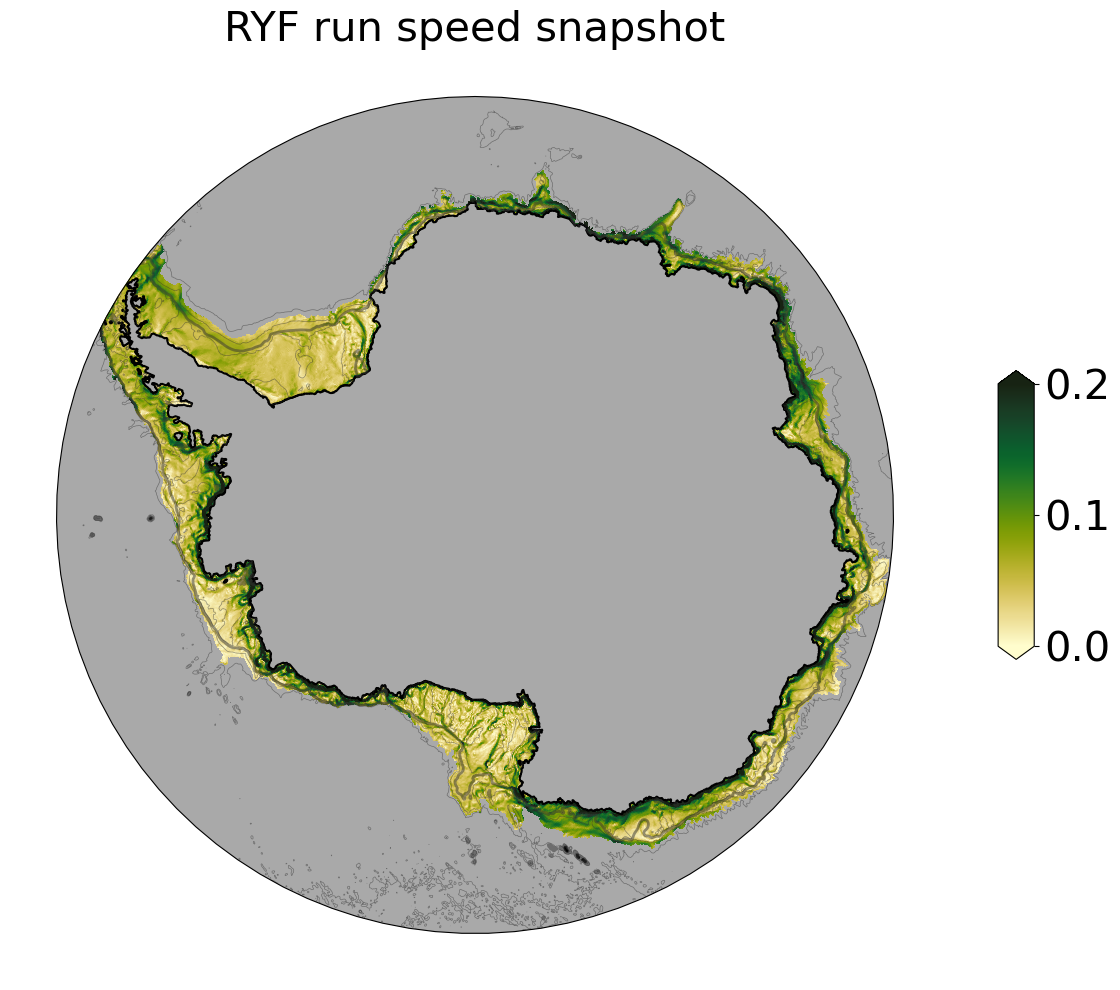

In [116]:
fig = plt.figure(1, figsize=(15, 15))

ax = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(), facecolor="darkgrey")
ax.set_boundary(circle, transform=ax.transAxes)
    
# Filled land 
land.plot.contourf(ax=ax, colors='darkgrey', zorder=2,
                   transform=ccrs.PlateCarree(), add_colorbar=False)

# Coastline
land.fillna(0).plot.contour(ax=ax, colors='k', levels=[0, 1],
                            transform=ccrs.PlateCarree(), add_colorbar=False)

# Depth contours
ht.plot.contour(ax=ax, levels=[500, 1000, 2000, 3000],
                colors='0.2', linewidths=[0.5, 2, 0.5, 0.5], alpha=0.5,
                transform=ccrs.PlateCarree())

# surface temp for mw component
sc = (np.sqrt(u_ryf.isel(time = 0)**2 + v_ryf.isel(time = 0)**2)).where(cluster_mask_access == True).__xarray_dataarray_variable__.plot(ax = ax, vmax = 0.2, vmin = 0, cmap=cmocean.cm.speed,  transform=ccrs.PlateCarree(),\
                       cbar_kwargs={'orientation': 'vertical',\
                                    'shrink': 0.25,\
                                    'extend': 'both',\
                                    'label': None, \
                                    'aspect': 8}) #cmap=cmocean.cm.balance,

ax.set_title('RYF run speed snapshot');

In [ ]:
#gett access grid to integrate

In [23]:
# NEEDload coordinates and grid specifications
geolat_t = cc.querying.getvar(expt, 'geolat_t', session=session, n=1)
geolon_t = cc.querying.getvar(expt, 'geolon_t', session=session, n=1)

dxt = cc.querying.getvar(expt=expt, variable='dxt', session=session, frequency='static', n=1)
dyt = cc.querying.getvar(expt=expt, variable='dyt', session=session, frequency='static', n=1)

dxu = cc.querying.getvar(expt=expt, variable='dxu', session=session, frequency='static', n=1)
dyu = cc.querying.getvar(expt=expt, variable='dyu', session=session, frequency='static', n=1)

In [24]:
# coordinates
lat_t = geolat_t.sel( xt_ocean= lon_lim,yt_ocean=lat_lim)
lon_t = geolon_t.sel(xt_ocean= lon_lim, yt_ocean=lat_lim)

dxt_lim = dxt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)
dyt_lim = dyt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)

dxu_lim = dxu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)
dyu_lim = dyu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)

In [25]:
# defining B-grid using xgcm
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
ocean_grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

In [26]:
## need to run seperately or it will crash
import xgcm
coordinates = xr.merge([dxt_lim, dyt_lim, dxu_lim, dyu_lim])

In [29]:
vel = xr.merge([coordinates, u_ryf, v_ryf, ocean_grid.sel(xt_ocean= lon_lim,xu_ocean= lon_lim, yt_ocean=lat_lim, yu_ocean = lat_lim).isel(time = 0)],compat='override')# time is flex_period before

In [30]:
vel.coords['xt_ocean'].attrs.update(axis='X')
vel.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5, periodic=False)
vel.coords['yt_ocean'].attrs.update(axis='Y')
vel.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
metrics = {
    ('X',): ['dxt', 'dxu'], # X distances
    ('Y',): ['dyt', 'dyu'], # Y distances
    ('X', 'Y'): ['area_t', 'area_u'] # Areas
}

In [31]:
grid = xgcm.Grid(vel, periodic=False, metrics = metrics,boundary='extend')
grid

<xgcm.Grid>
Y Axis (not periodic, boundary='extend'):
  * center   yt_ocean --> right
  * right    yu_ocean --> center
X Axis (not periodic, boundary='extend'):
  * center   xt_ocean --> right
  * right    xu_ocean --> center

In [20]:
area_u = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='area_u', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(xu_ocean= lon_lim, yu_ocean = lat_lim)
circ_ASC_area = (area_u*cluster_mask_access).sum()                                                                                                                                                                                        

In [109]:
## Line plot to get better idea
speed_ryf_coast_t = []
speed_wthp_coast_t = []
speed_wthmp_coast_t = []
for n in range(5):
    speed_wthmp = np.sqrt(u_wthmp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthmp.isel(time = slice(120*n, 120*(n+1)))**2).where(cluster_mask_access == True)
    speed_wthp = np.sqrt(u_wthp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthp.isel(time = slice(120*n, 120*(n+1)))**2).where(cluster_mask_access == True)
    speed_ryf = np.sqrt(u_ryf.isel(time = slice(120*n, 120*(n+1)))**2 + v_ryf.isel(time = slice(120*n, 120*(n+1)))**2).where(cluster_mask_access == True)
    
    speed_wthmp_coast_t.append(grid.integrate(speed_wthmp, ['X','Y']).load()/circ_ASC_area)
    speed_wthp_coast_t.append(grid.integrate(speed_wthp, ['X','Y']).load()/circ_ASC_area)
    speed_ryf_coast_t.append(grid.integrate(speed_ryf, ['X','Y']).load()/circ_ASC_area)

In [11]:
def weighted_temporal_mean(ds):
    """
    weight by days in each month
    """
    # Determine the month length
    month_length = ds.time.dt.days_in_month

    # Calculate the weights
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

    # Make sure the weights in each year add up to 1
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)

    # Subset our dataset for our variable
    obs = ds.__xarray_dataarray_variable__
    
    # Setup our masking for nan values
    cond = obs.isnull()
    ones = xr.where(cond, 0.0, 1.0)
    

    # Calculate the numerator
    obs_sum = (obs * wgts).resample(time="AS").sum(dim="time")

    # Calculate the denominator
    ones_out = (ones * wgts).resample(time="AS").sum(dim="time")

    # Return the weighted average
    return obs_sum / ones_out

(0.0, 0.15)

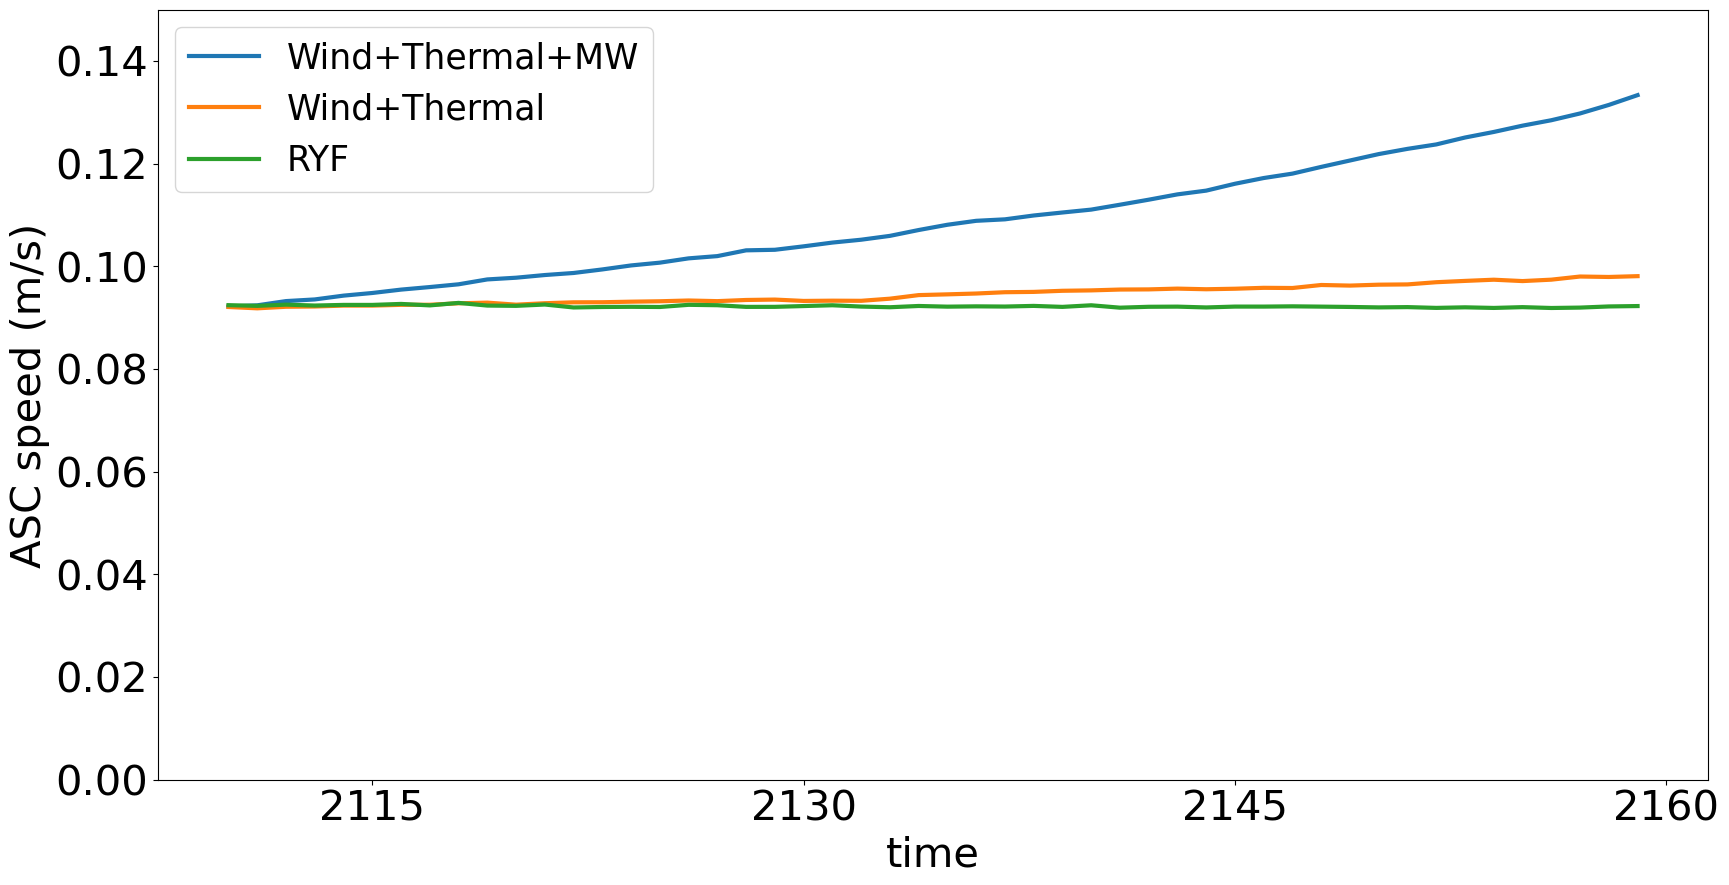

In [112]:
plt.figure(figsize = (20,10))
weighted_temporal_mean(xr.merge(speed_wthmp_coast_t)).plot( label = 'Wind+Thermal+MW', lw =3)
weighted_temporal_mean(xr.merge(speed_wthp_coast_t)).plot(label = 'Wind+Thermal', lw =3)
weighted_temporal_mean(xr.merge(speed_ryf_coast_t)).plot(label = 'RYF', lw =3)
plt.ylabel('ASC speed (m/s)')
plt.legend()
plt.ylim([0,0.15])

(0.0, 0.17)

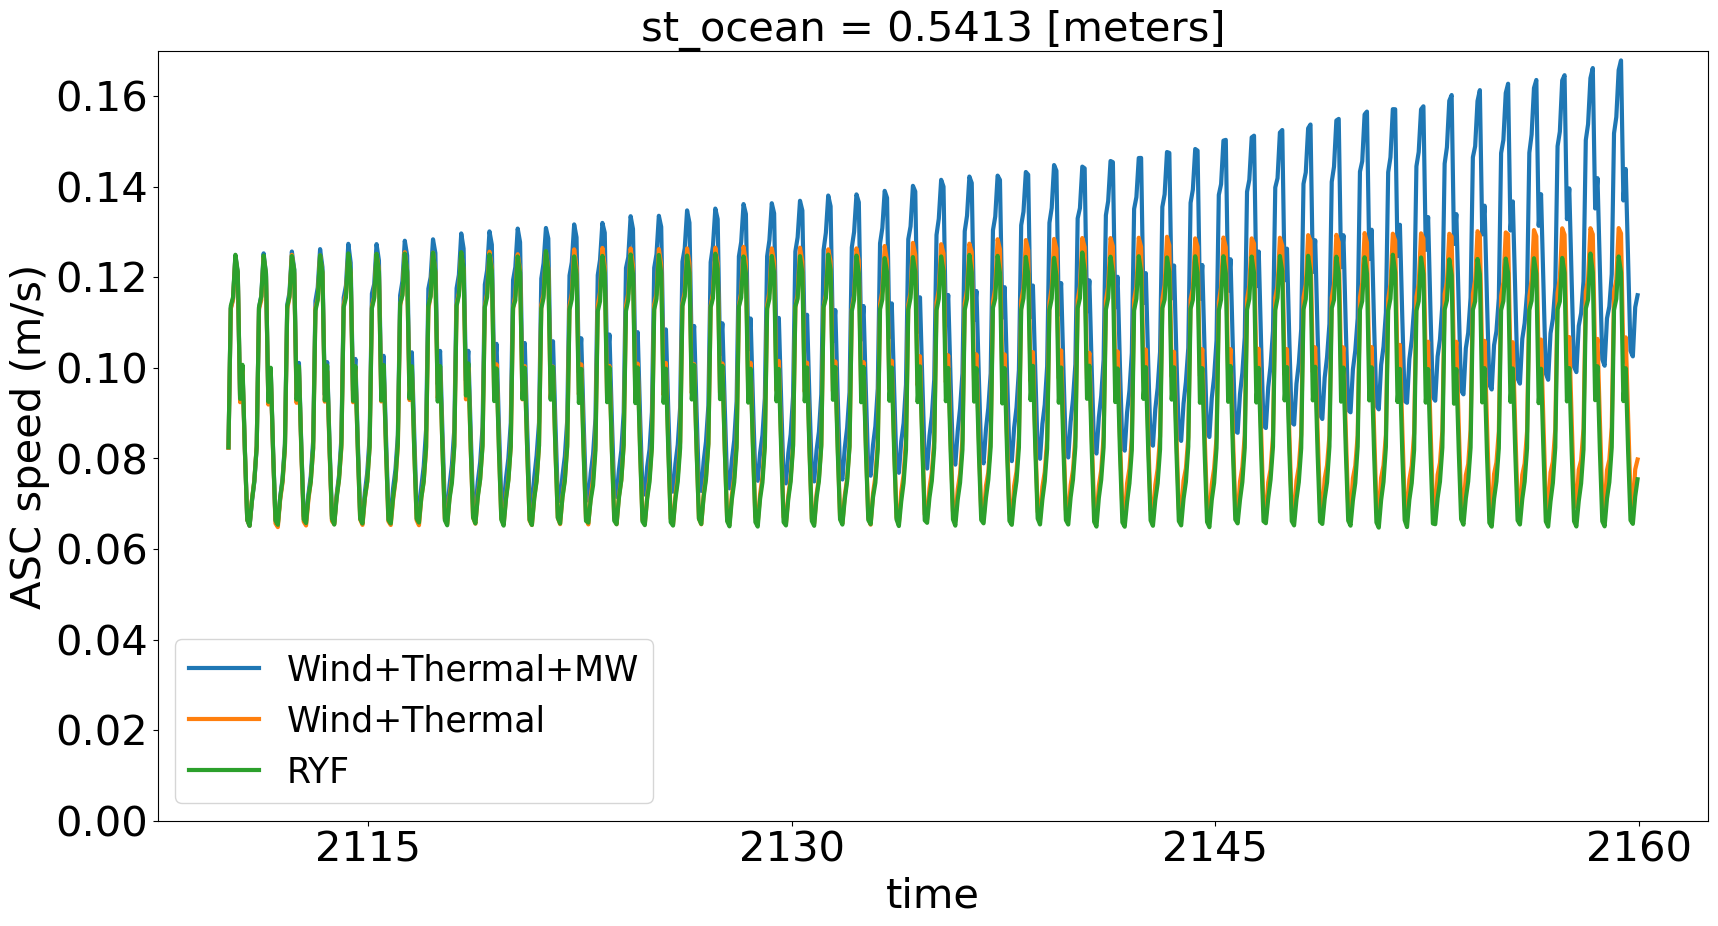

In [115]:
plt.figure(figsize = (20,10))
xr.merge(speed_wthmp_coast_t).__xarray_dataarray_variable__.plot( label = 'Wind+Thermal+MW', lw =3)
xr.merge(speed_wthp_coast_t).__xarray_dataarray_variable__.plot(label = 'Wind+Thermal', lw =3)
xr.merge(speed_ryf_coast_t).__xarray_dataarray_variable__.plot(label = 'RYF', lw =3)
plt.ylabel('ASC speed (m/s)')
plt.legend()
plt.ylim([0,0.17])

In [ ]:
## split into coastal and slope current

In [17]:
mask_shelf = xr.where(hu<1000 , True, False)
mask_slope = xr.where(hu>1000, True, False)

In [41]:
mask_slope.values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

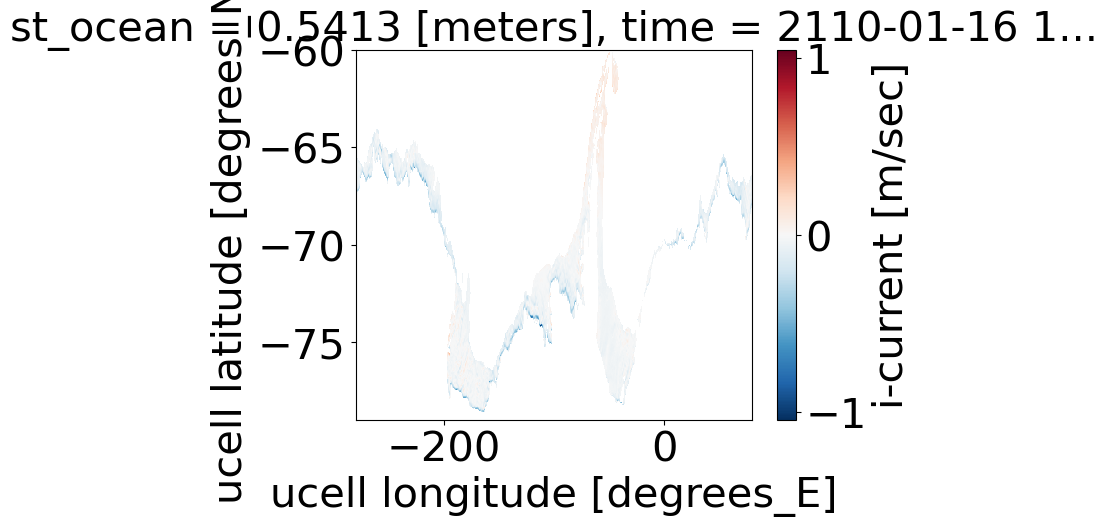

In [42]:
u_ryf.isel(time = 0).where(cluster_mask_access == True).where(mask_shelf ==True).__xarray_dataarray_variable__.plot()

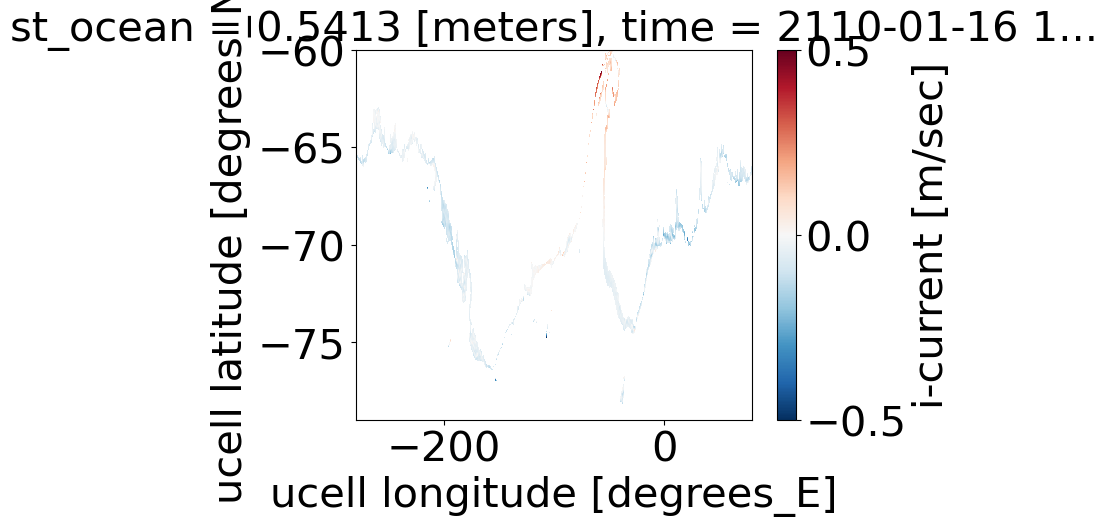

In [43]:
u_ryf.isel(time = 0).where(cluster_mask_access == True).where(mask_slope ==True).__xarray_dataarray_variable__.plot()

In [35]:
## change masked region in question
region = 'Shelf region'
## Change the above line

if region == 'Slope region':
    mask_region = mask_slope
elif region == 'Shelf region':
    mask_region = mask_shelf


In [63]:
## Line plot to get better idea
speed_ryf_mask_t = []
speed_wthp_mask_t = []
speed_wthmp_mask_t = []
for n in range(5):
    speed_wthmp = np.sqrt(u_wthmp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthmp.isel(time = slice(120*n, 120*(n+1)))**2).where(cluster_mask_access == True).where(mask_region ==True)
    speed_wthp = np.sqrt(u_wthp.isel(time = slice(120*n, 120*(n+1)))**2 + v_wthp.isel(time = slice(120*n, 120*(n+1)))**2).where(cluster_mask_access == True).where(mask_region ==True)
    speed_ryf = np.sqrt(u_ryf.isel(time = slice(120*n, 120*(n+1)))**2 + v_ryf.isel(time = slice(120*n, 120*(n+1)))**2).where(cluster_mask_access == True).where(mask_region ==True)
    circ_area = (area_u*cluster_mask_access.where(mask_region ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
    speed_wthmp_mask_t.append(grid.integrate(speed_wthmp, ['X','Y']).load()/circ_area)
    speed_wthp_mask_t.append(grid.integrate(speed_wthp, ['X','Y']).load()/circ_area)
    speed_ryf_mask_t.append(grid.integrate(speed_ryf, ['X','Y']).load()/circ_area)

In [64]:
(area_u*cluster_mask_access.where(mask_region ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                        

array(2.92146298e+12)

In [50]:
circ_ASC_area.__xarray_dataarray_variable__.values                                                                                                                                                                                        

array(3.917276e+12, dtype=float32)

Text(0.5, 1.0, 'Shelf region annual average')

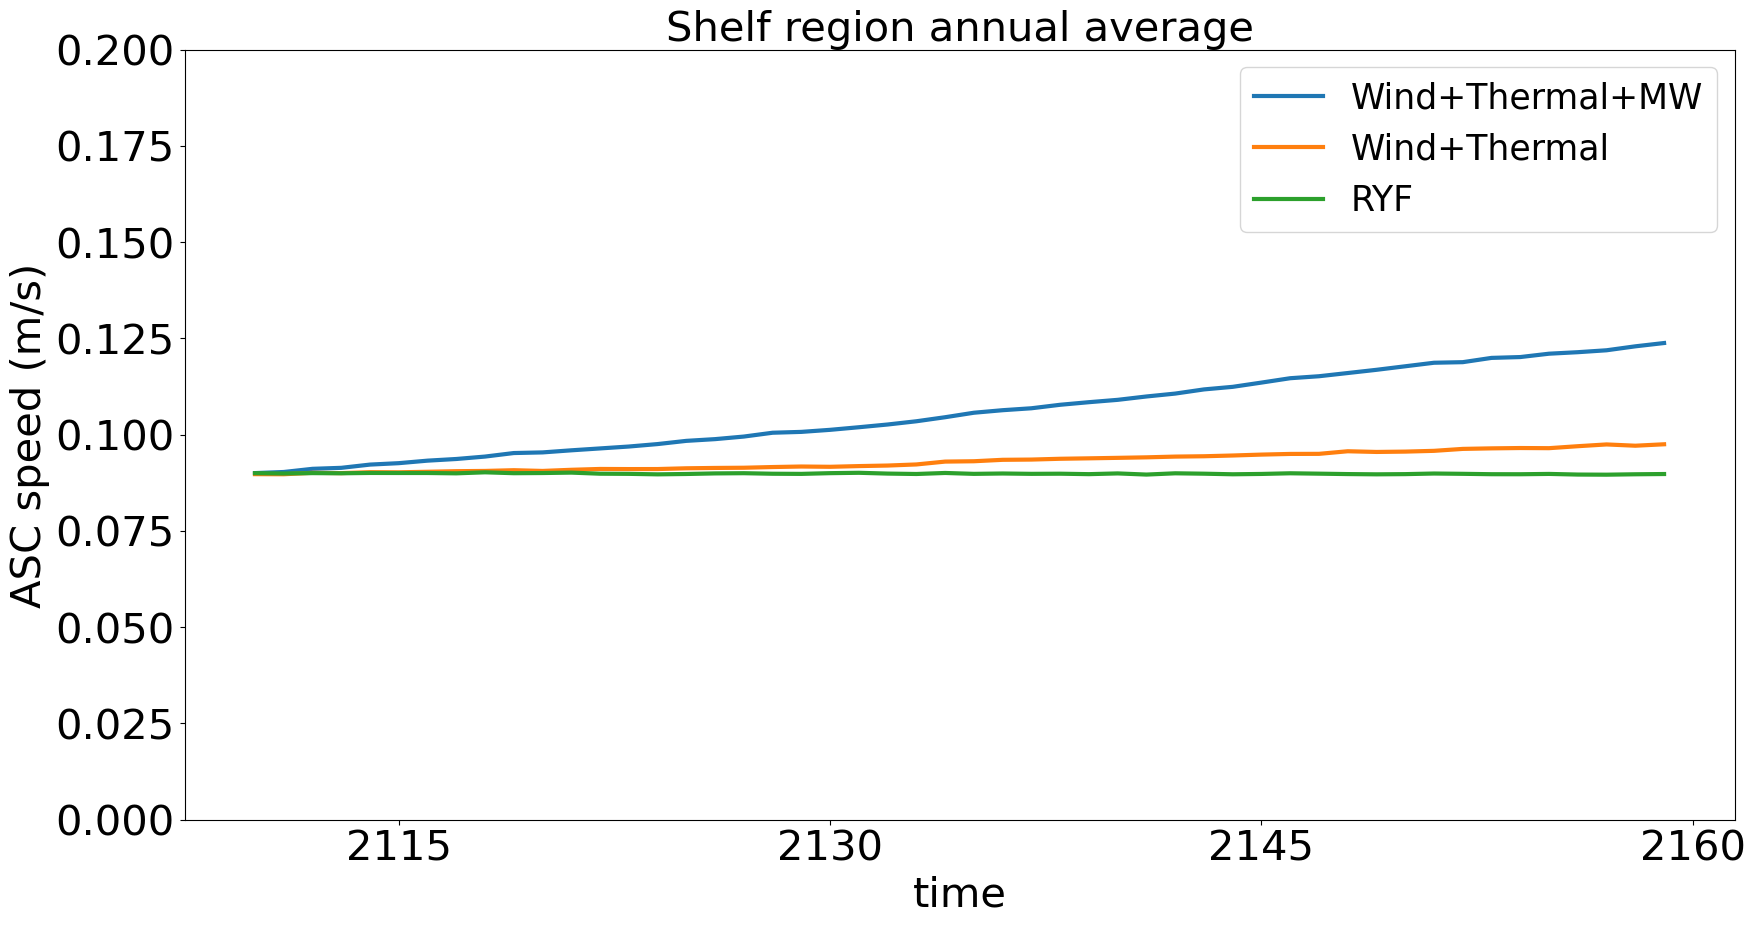

In [65]:
plt.figure(figsize = (20,10))
weighted_temporal_mean(xr.merge(speed_wthmp_mask_t)).plot( label = 'Wind+Thermal+MW', lw =3)
weighted_temporal_mean(xr.merge(speed_wthp_mask_t)).plot(label = 'Wind+Thermal', lw =3)
weighted_temporal_mean(xr.merge(speed_ryf_mask_t)).plot(label = 'RYF', lw =3)
plt.ylabel('ASC speed (m/s)')
plt.legend()
plt.ylim([0,0.2])
plt.title(region + ' annual average')

Text(0.5, 1.0, 'Shelf region daily')

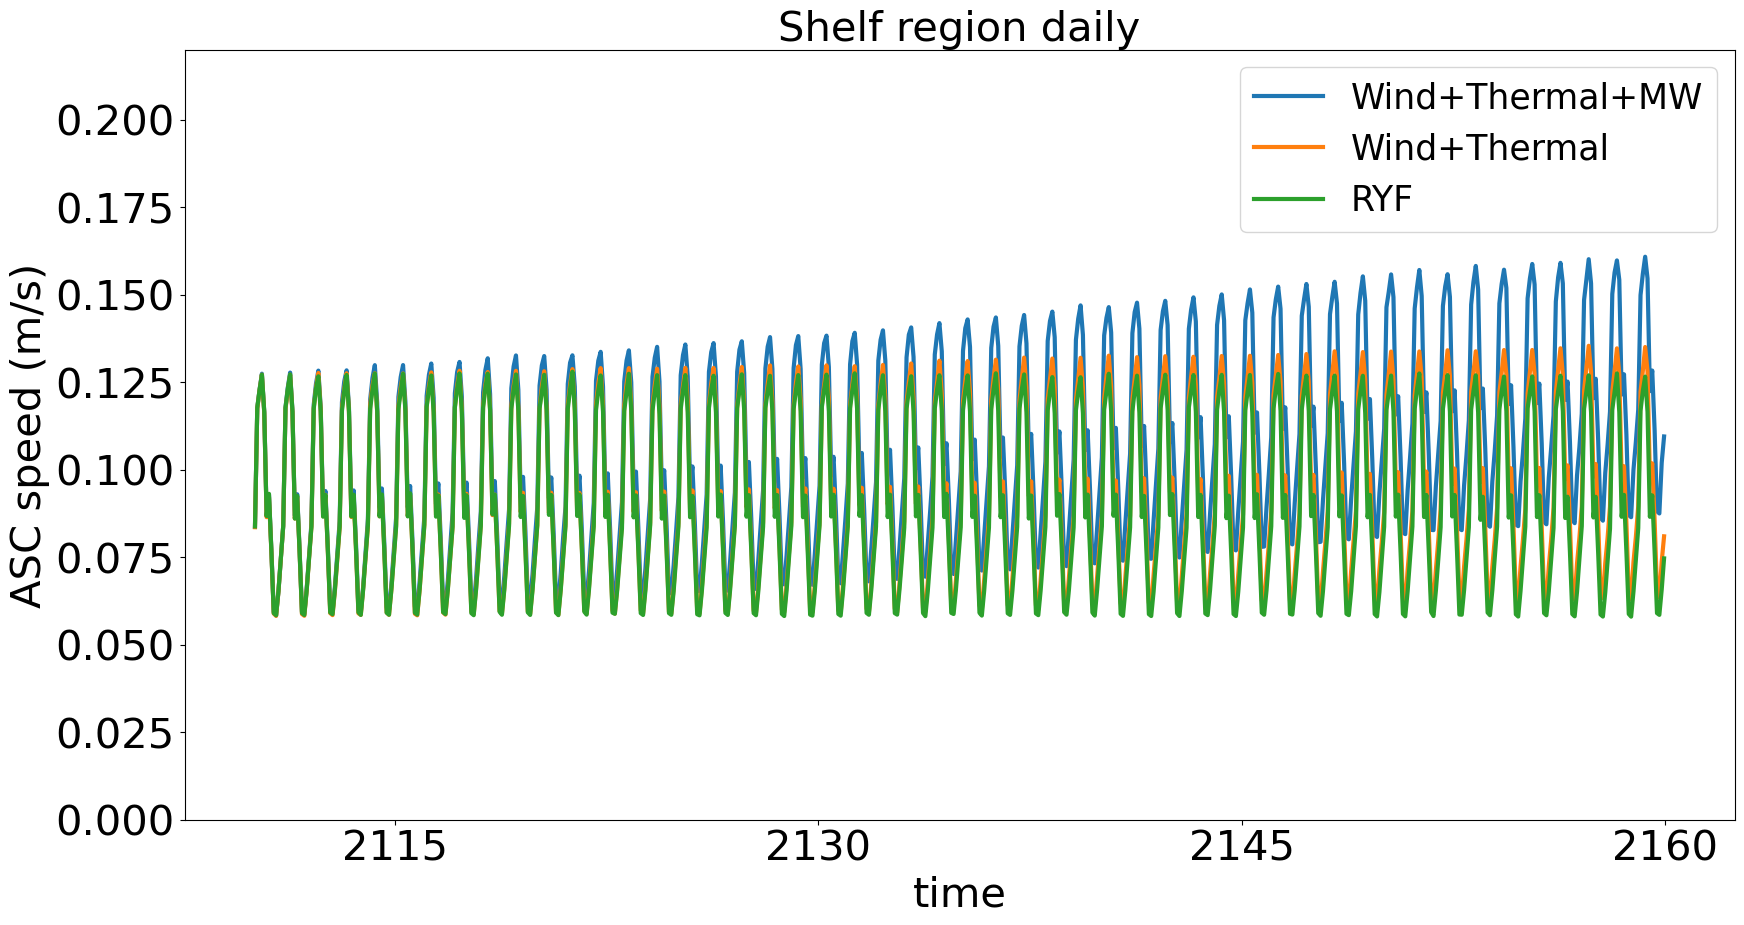

In [66]:
plt.figure(figsize = (20,10))
xr.merge(speed_wthmp_mask_t).__xarray_dataarray_variable__.plot( label = 'Wind+Thermal+MW', lw =3)
xr.merge(speed_wthp_mask_t).__xarray_dataarray_variable__.plot(label = 'Wind+Thermal', lw =3)
xr.merge(speed_ryf_mask_t).__xarray_dataarray_variable__.plot(label = 'RYF', lw =3)
plt.ylabel('ASC speed (m/s)')
plt.legend()
plt.ylim([0,0.22])
plt.title(region + ' daily')

In [ ]:
# Depth-average


In [10]:
u_wthmp_z = cc.querying.getvar(expt=exp_wthmp, variable='u', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim)#.isel(st_ocean = 0)
v_wthmp_z = cc.querying.getvar(expt=exp_wthmp, variable='v', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim)#.isel(st_ocean = 0)
u_wthp_z = cc.querying.getvar(expt=exp_wthp, variable='u', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim)#.isel(st_ocean = 0)
v_wthp_z = cc.querying.getvar(expt=exp_wthp, variable='v', 
                          session=session, frequency='1 monthly',
                          attrs={'cell_methods': 'time: mean'},
                          start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim)#.isel(st_ocean = 0)
u_wthp_z

<xarray.DataArray 'u' (time: 600, st_ocean: 75, yu_ocean: 440, xu_ocean: 3600)> Size: 285GB
dask.array<getitem, shape=(600, 75, 440, 3600), dtype=float32, chunksize=(1, 7, 250, 400), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_x_velocity
    ncfiles:        ['/g/data/cj50/access-om2/raw-output/access-om2-01/01deg_...

In [11]:
u_ryf_z = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='u', 
                          session=session, frequency='1 monthly', start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim)#.isel(st_ocean = 0)
v_ryf_z = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='v', 
                          session=session, frequency='1 monthly' ,start_time='2110-01-31 00:00:00', 
                          end_time='2159-12-31 00:00:00').sel(yu_ocean = lat_lim)#.isel(st_ocean = 0)
v_ryf_z

<xarray.DataArray 'v' (time: 600, st_ocean: 75, yu_ocean: 440, xu_ocean: 3600)> Size: 285GB
dask.array<getitem, shape=(600, 75, 440, 3600), dtype=float32, chunksize=(1, 7, 250, 400), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) object 5kB 2110-01-16 12:00:00 ... 2159-12-16 12:00:00
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
Attributes: (12/13)
    long_name:      j-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_y_velocity
    ...             ...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration with JRA...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...
    url:            https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra5...

In [12]:
# making thickness array using depth levels
thickness = []
for i in range(len(u_wthmp_z.st_ocean)):
    if i == 0:
        thickness_elem = u_wthmp_z.st_ocean[0].values
    else:
        thickness_elem = u_wthmp_z.st_ocean[i].values -  u_wthmp_z.st_ocean[i-1].values 
    thickness.append(thickness_elem)
data = np.stack(thickness)
thickness_arr = xr.DataArray(data,  coords = {'st_ocean':u_wthmp_z.st_ocean.values})

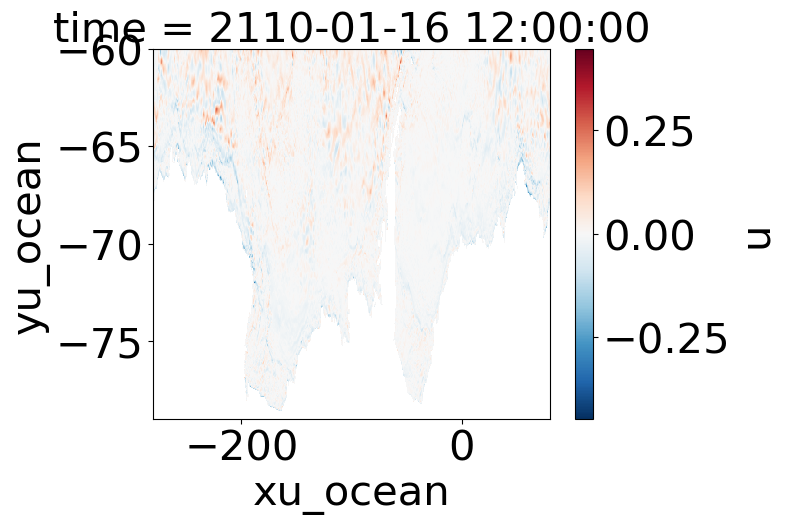

In [192]:
u_wthmp_z.weighted(thickness_arr).mean(dim = 'st_ocean').isel(time = 0).plot()

In [36]:
def calc_depthav_speed(u_field,v_field):
    speed_depthav_t = []
    for n in range(3):
        speed = np.sqrt(u_field.isel(time = slice(200*n, 200*(n+1)))**2 + v_field.isel(time = slice(200*n, 200*(n+1)))**2).where(cluster_mask_access == True)
        speed_depthav = speed.weighted(thickness_arr).mean(dim = 'st_ocean')
        speed_depthav_t.append(grid.integrate(speed_depthav, ['X','Y']).load()/circ_ASC_area)
        print(n ,' is done')
    return xr.merge(speed_depthav_t)

In [37]:
%%time
speed_depthav_wthmp_t = calc_depthav_speed(u_wthmp_z,v_wthmp_z)

0  is done
1  is done
2  is done
CPU times: user 37min 13s, sys: 3min 12s, total: 40min 26s
Wall time: 43min 8s


In [38]:
speed_depthav_wthp_t = calc_depthav_speed(u_wthp_z,v_wthp_z)
speed_depthav_ryf_t = calc_depthav_speed(u_ryf_z,v_ryf_z)

0  is done
1  is done
2  is done
0  is done
1  is done
2  is done


In [40]:
speed_depthav_wthp_t

<xarray.Dataset> Size: 10kB
Dimensions:                        (time: 600)
Coordinates:
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float64 5kB dask.array<chunksize=(600,), meta=np.ndarray>

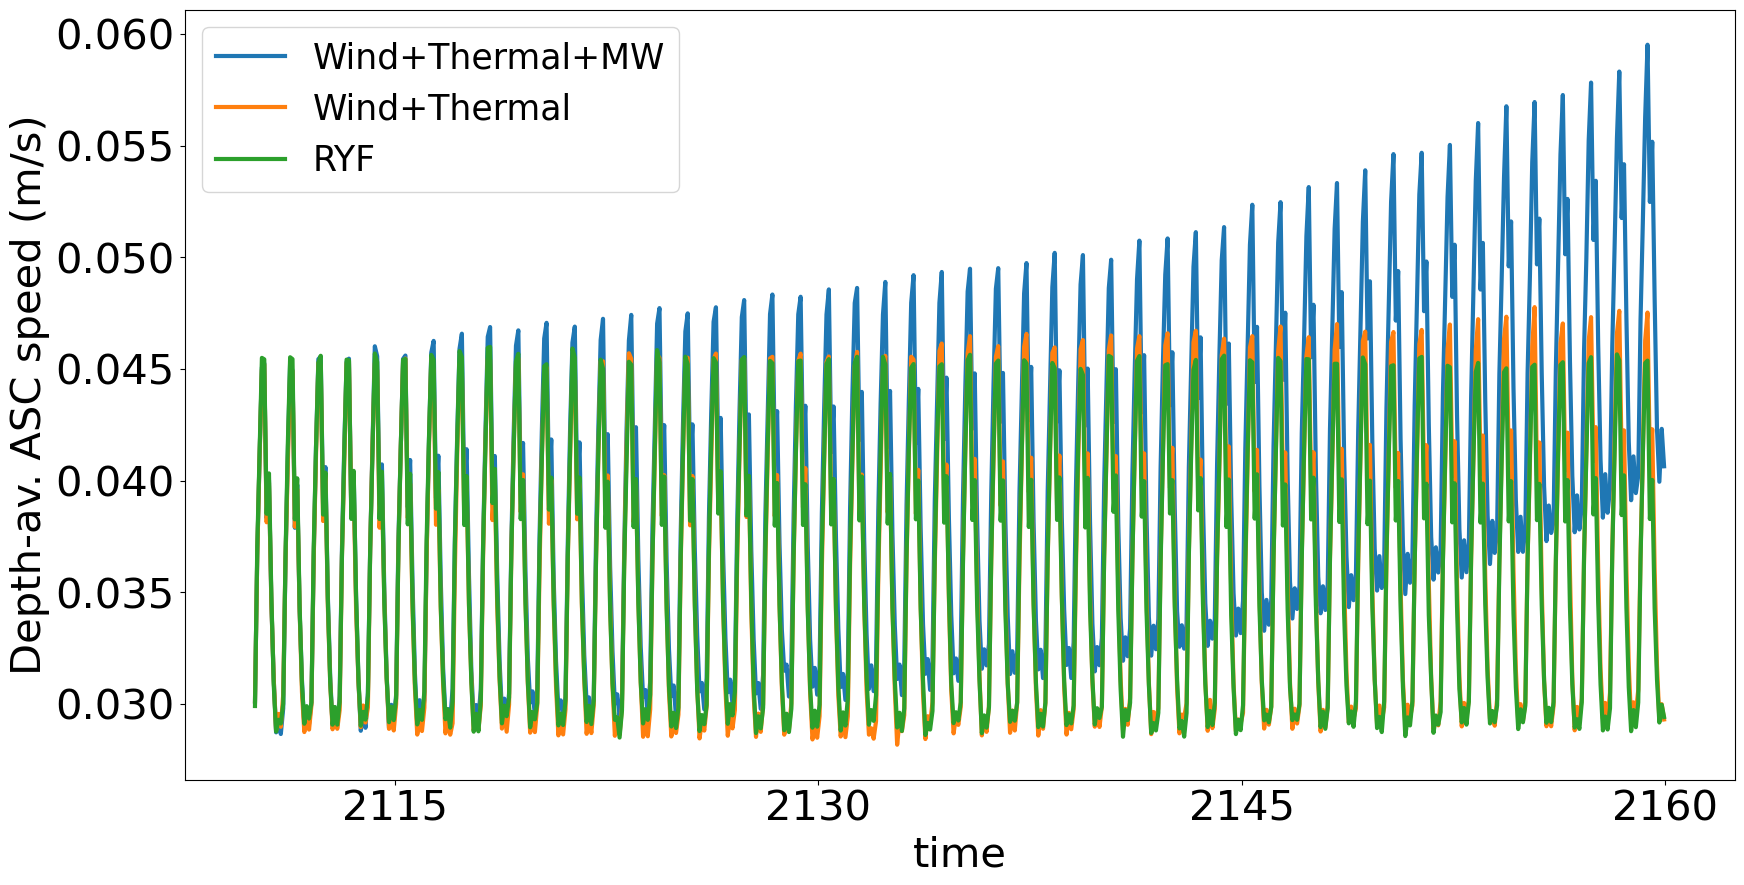

In [42]:
plt.figure(figsize = (20,10))
speed_depthav_wthmp_t.__xarray_dataarray_variable__.plot( label = 'Wind+Thermal+MW', lw =3)
speed_depthav_wthp_t.__xarray_dataarray_variable__.plot(label = 'Wind+Thermal', lw =3)
speed_depthav_ryf_t.__xarray_dataarray_variable__.plot(label = 'RYF', lw =3)
plt.ylabel('Depth-av. ASC speed (m/s)')
plt.legend()
#plt.ylim([0,0.17])

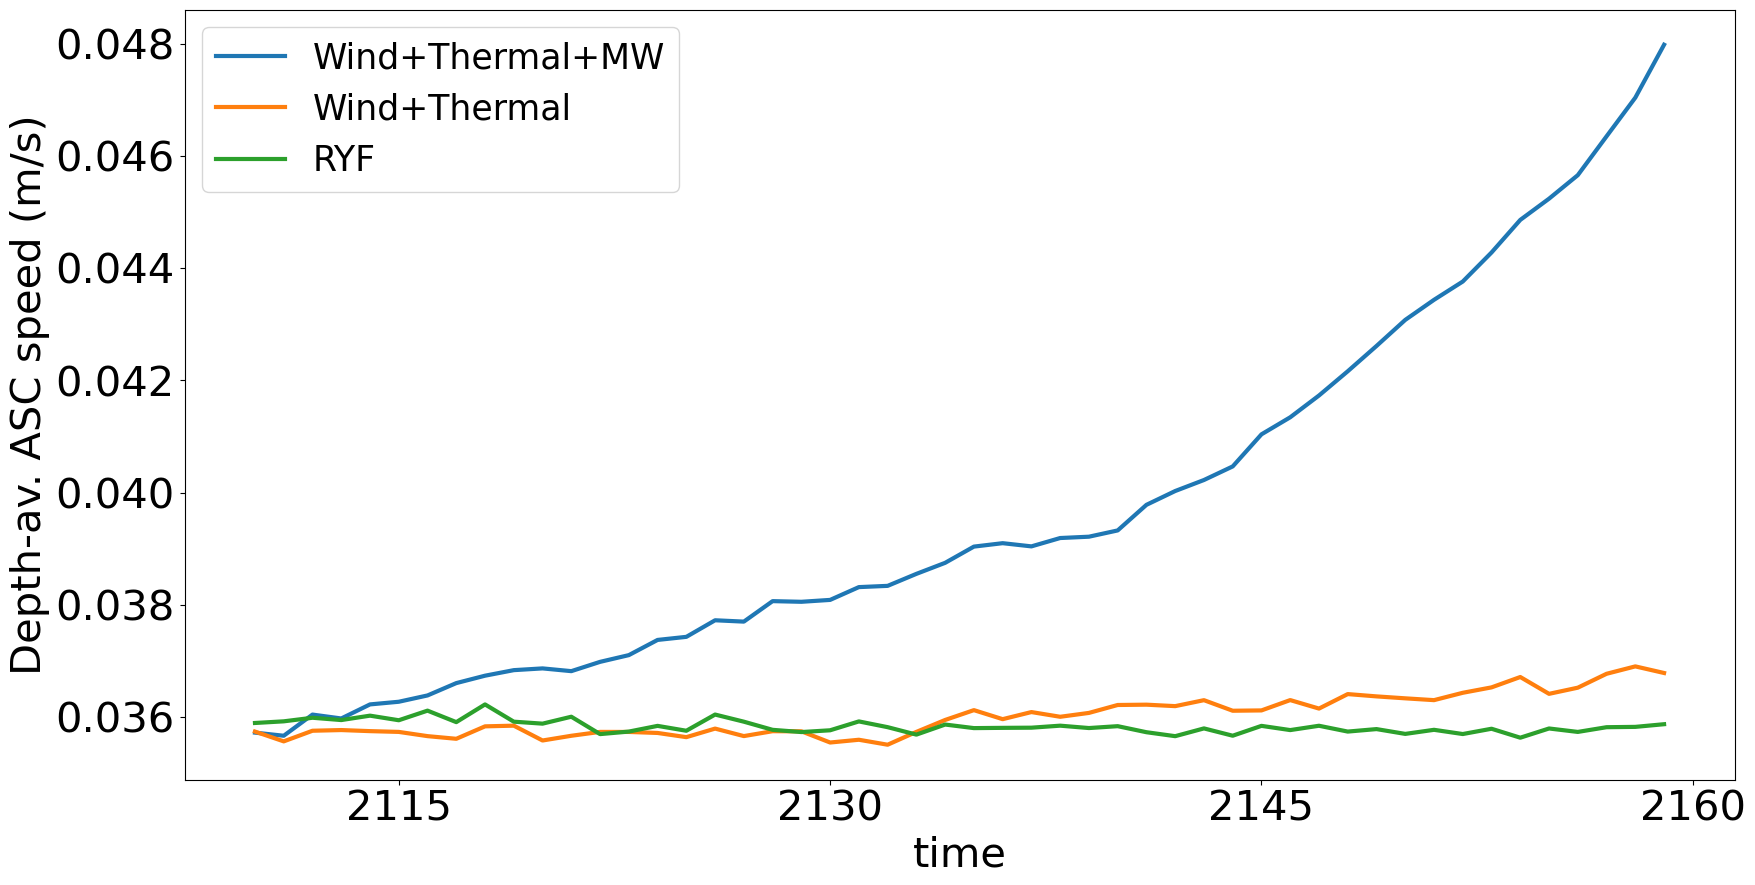

In [46]:
plt.figure(figsize = (20,10))
weighted_temporal_mean(speed_depthav_wthmp_t).plot( label = 'Wind+Thermal+MW', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t).plot(label = 'Wind+Thermal', lw =3)
weighted_temporal_mean(speed_depthav_ryf_t).plot(label = 'RYF', lw =3)
plt.ylabel('Depth-av. ASC speed (m/s)')
plt.legend()
#plt.ylim([0,0.17])

In [47]:
speed_depthav_wthmp_t.to_netcdf('speed_depthav_wthmp_t.nc')
speed_depthav_wthp_t.to_netcdf('speed_depthav_wthp_t.nc')
speed_depthav_ryf_t.to_netcdf('speed_depthav_ryf_t.nc')

In [13]:
pwd

'/home/561/qo9901'

In [14]:
def calc_depthav_speed_mask(u_field,v_field, mask_region):
    speed_depthav_t = []
    for n in range(3):
        speed = np.sqrt(u_field.isel(time = slice(200*n, 200*(n+1)))**2 + v_field.isel(time = slice(200*n, 200*(n+1)))**2).where(cluster_mask_access == True).where(mask_region ==True)
        speed_depthav = speed.weighted(thickness_arr).mean(dim = 'st_ocean')
        circ_area = (area_u*cluster_mask_access.where(mask_region ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           

        speed_depthav_t.append(grid.integrate(speed_depthav, ['X','Y']).load()/circ_area)
        print(n ,' is done')
    return xr.merge(speed_depthav_t)

In [32]:
%%time
speed_depthav_wthmp_t_shelf = calc_depthav_speed_mask(u_wthmp_z,v_wthmp_z, mask_shelf)

0  is done
1  is done
2  is done
CPU times: user 26min 54s, sys: 36.8 s, total: 27min 31s
Wall time: 27min 19s


In [39]:
speed_depthav_wthp_t_shelf = calc_depthav_speed_mask(u_wthp_z,v_wthp_z, mask_shelf)

0  is done
1  is done
2  is done


In [ ]:
speed_depthav_ryf_t_shelf = calc_depthav_speed_mask(u_ryf_z,v_ryf_z,mask_shelf)

In [74]:
%%time
speed_depthav_wthmp_t_slope = calc_depthav_speed_mask(u_wthmp_z,v_wthmp_z, mask_slope)

0  is done
1  is done
2  is done
CPU times: user 36min 2s, sys: 1min 1s, total: 37min 3s
Wall time: 36min 43s


In [49]:
%%time
#speed_depthav_wthp_t_slope = calc_depthav_speed_mask(u_wthp_z,v_wthp_z,mask_slope)
speed_depthav_ryf_t_slope = calc_depthav_speed_mask(u_ryf_z,v_ryf_z,mask_slope)

0  is done
1  is done
2  is done
CPU times: user 33min 55s, sys: 1min 50s, total: 35min 45s
Wall time: 34min 55s


In [ ]:
plt.figure(figsize = (20,10))
weighted_temporal_mean(speed_depthav_wthmp_t_shelf).plot( label = 'Wind+Thermal+MW', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t_shelf).plot(label = 'Wind+Thermal', lw =3)
weighted_temporal_mean(speed_depthav_ryf_t_shelf).plot(label = 'RYF', lw =3)
plt.ylabel('Depth-av. ASC speed (m/s)')
plt.legend()
#plt.ylim([0,0.17])
plt.title(region + ' annual average')

In [ ]:
plt.figure(figsize = (20,10))
weighted_temporal_mean(speed_depthav_wthmp_t_slope).plot( label = 'Wind+Thermal+MW', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t_slope).plot(label = 'Wind+Thermal', lw =3)
weighted_temporal_mean(speed_depthav_ryf_t_slope).plot(label = 'RYF', lw =3)
plt.ylabel('Depth-av. ASC speed (m/s)')
plt.legend()
#plt.ylim([0,0.17])

In [51]:
#speed_depthav_wthmp_t_slope.to_netcdf('speed_depthav_wthmp_t_slope.nc')
#speed_depthav_wthp_t_slope.to_netcdf('speed_depthav_wthp_t_slope.nc')
speed_depthav_ryf_t_slope.to_netcdf('speed_depthav_ryf_t_slope.nc')

In [10]:
speed_depthav_wthmp_t_slope = xr.open_mfdataset('speed_depthav_wthmp_t_slope.nc')
speed_depthav_wthp_t_slope = xr.open_mfdataset('speed_depthav_wthp_t_slope.nc')
speed_depthav_wthmp_t_shelf = xr.open_mfdataset('speed_depthav_wthmp_t_shelf.nc')
speed_depthav_wthp_t_shelf = xr.open_mfdataset('speed_depthav_wthp_t_shelf.nc')

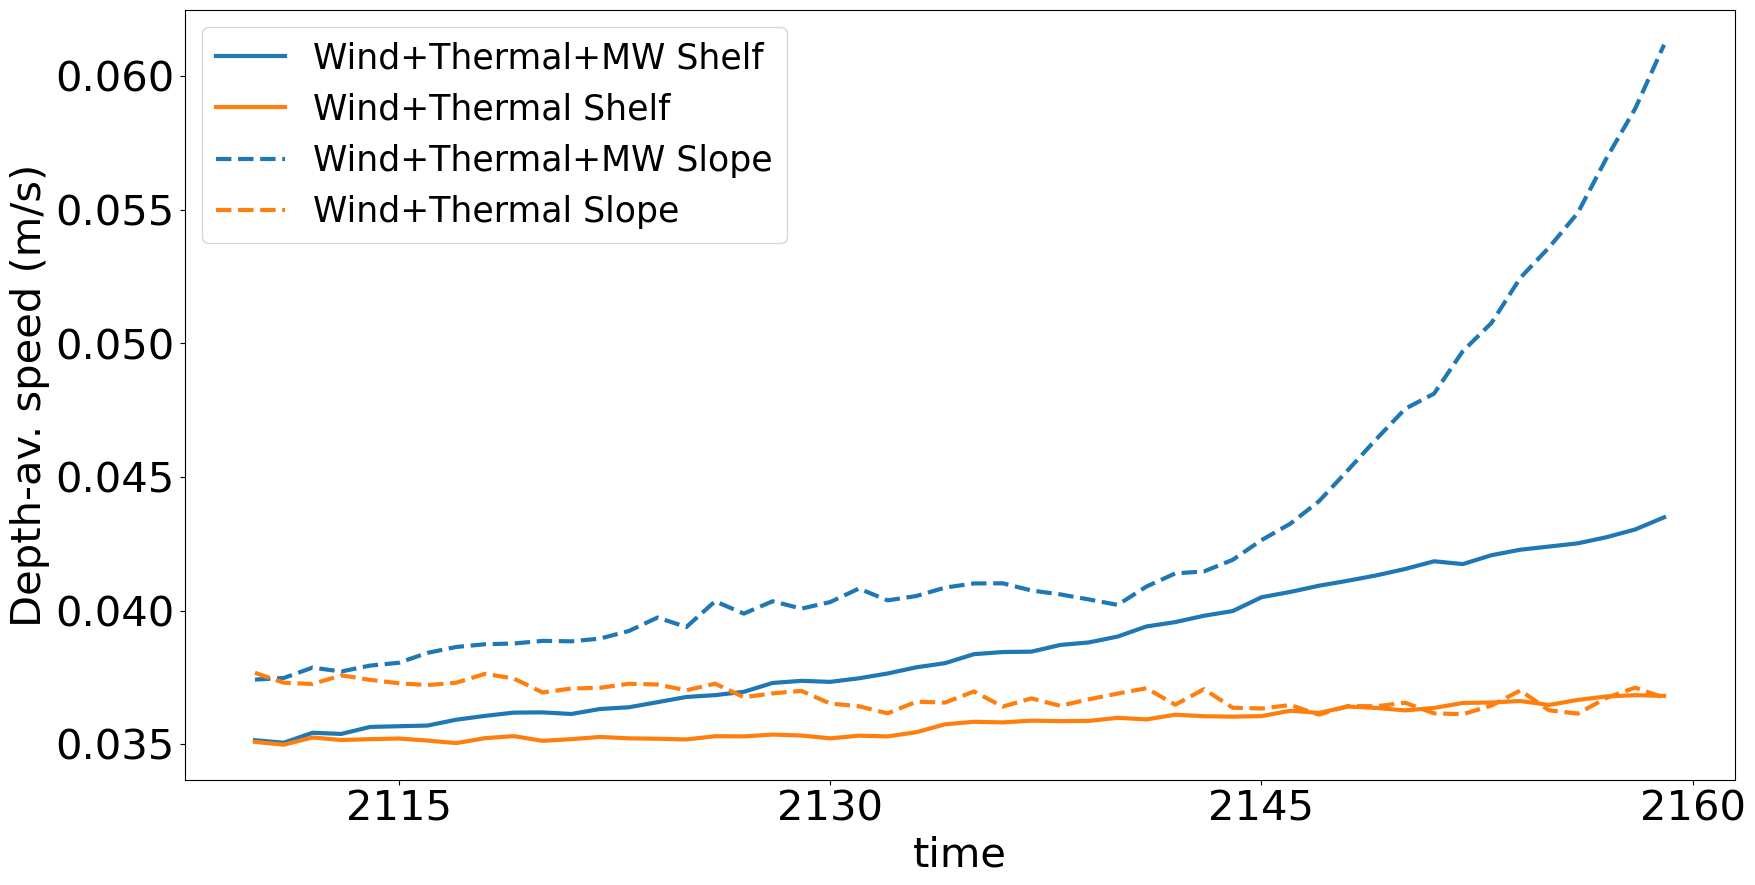

In [12]:
plt.figure(figsize = (20,10))
weighted_temporal_mean(speed_depthav_wthmp_t_shelf).plot( label = 'Wind+Thermal+MW Shelf', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t_shelf).plot(label = 'Wind+Thermal Shelf', lw =3)
weighted_temporal_mean(speed_depthav_wthmp_t_slope).plot( label = 'Wind+Thermal+MW Slope', linestyle = 'dashed', color = 'C0', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t_slope).plot(label = 'Wind+Thermal Slope', linestyle = 'dashed', color = 'C1', lw =3)
plt.ylabel('Depth-av. speed (m/s)')
plt.legend()
#plt.ylim([0,0.17])

In [13]:
speed_depthav_wthmp_t_shelf

<xarray.Dataset> Size: 10kB
Dimensions:                        (time: 600)
Coordinates:
  * time                           (time) object 5kB 2110-01-16 12:00:00 ... ...
Data variables:
    __xarray_dataarray_variable__  (time) float64 5kB dask.array<chunksize=(600,), meta=np.ndarray>

In [20]:
## cumulative meltwater addition
MW_ant_final = 0.08 # [Sv], 0.160 sv/century added around west antarctica
m_MW_ant = 0.08/len(speed_depthav_wthmp_t_shelf.time)
y_MW_ant = m_MW_ant*np.arange(1,len(speed_depthav_wthmp_t_shelf.time)+1)
#y_MW_ant

In [39]:
np.cumsum(y_MW_ant)

array([1.33333333e-04, 4.00000000e-04, 8.00000000e-04, 1.33333333e-03,
       2.00000000e-03, 2.80000000e-03, 3.73333333e-03, 4.80000000e-03,
       6.00000000e-03, 7.33333333e-03, 8.80000000e-03, 1.04000000e-02,
       1.21333333e-02, 1.40000000e-02, 1.60000000e-02, 1.81333333e-02,
       2.04000000e-02, 2.28000000e-02, 2.53333333e-02, 2.80000000e-02,
       3.08000000e-02, 3.37333333e-02, 3.68000000e-02, 4.00000000e-02,
       4.33333333e-02, 4.68000000e-02, 5.04000000e-02, 5.41333333e-02,
       5.80000000e-02, 6.20000000e-02, 6.61333333e-02, 7.04000000e-02,
       7.48000000e-02, 7.93333333e-02, 8.40000000e-02, 8.88000000e-02,
       9.37333333e-02, 9.88000000e-02, 1.04000000e-01, 1.09333333e-01,
       1.14800000e-01, 1.20400000e-01, 1.26133333e-01, 1.32000000e-01,
       1.38000000e-01, 1.44133333e-01, 1.50400000e-01, 1.56800000e-01,
       1.63333333e-01, 1.70000000e-01, 1.76800000e-01, 1.83733333e-01,
       1.90800000e-01, 1.98000000e-01, 2.05333333e-01, 2.12800000e-01,
      

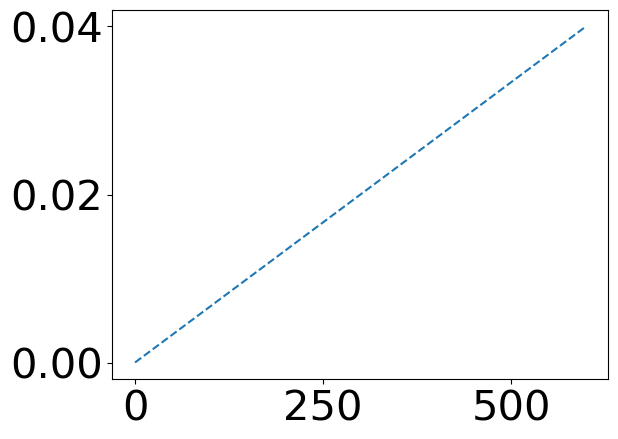

In [47]:
plt.plot(np.cumsum(y_MW_ant))
plt.plot(m_MW_ant * (np.arange(1,len(speed_depthav_wthmp_t_shelf.time)+1))**2 *0.5, linestyle = 'dashed')
# integrating over m_MW_ant * t where t is in number of days MW forcing is applied -- \int [Sv] dt = [Sv][days]

Text(0, 0.5, 'Cumulative MW forcing (Sv x days)')

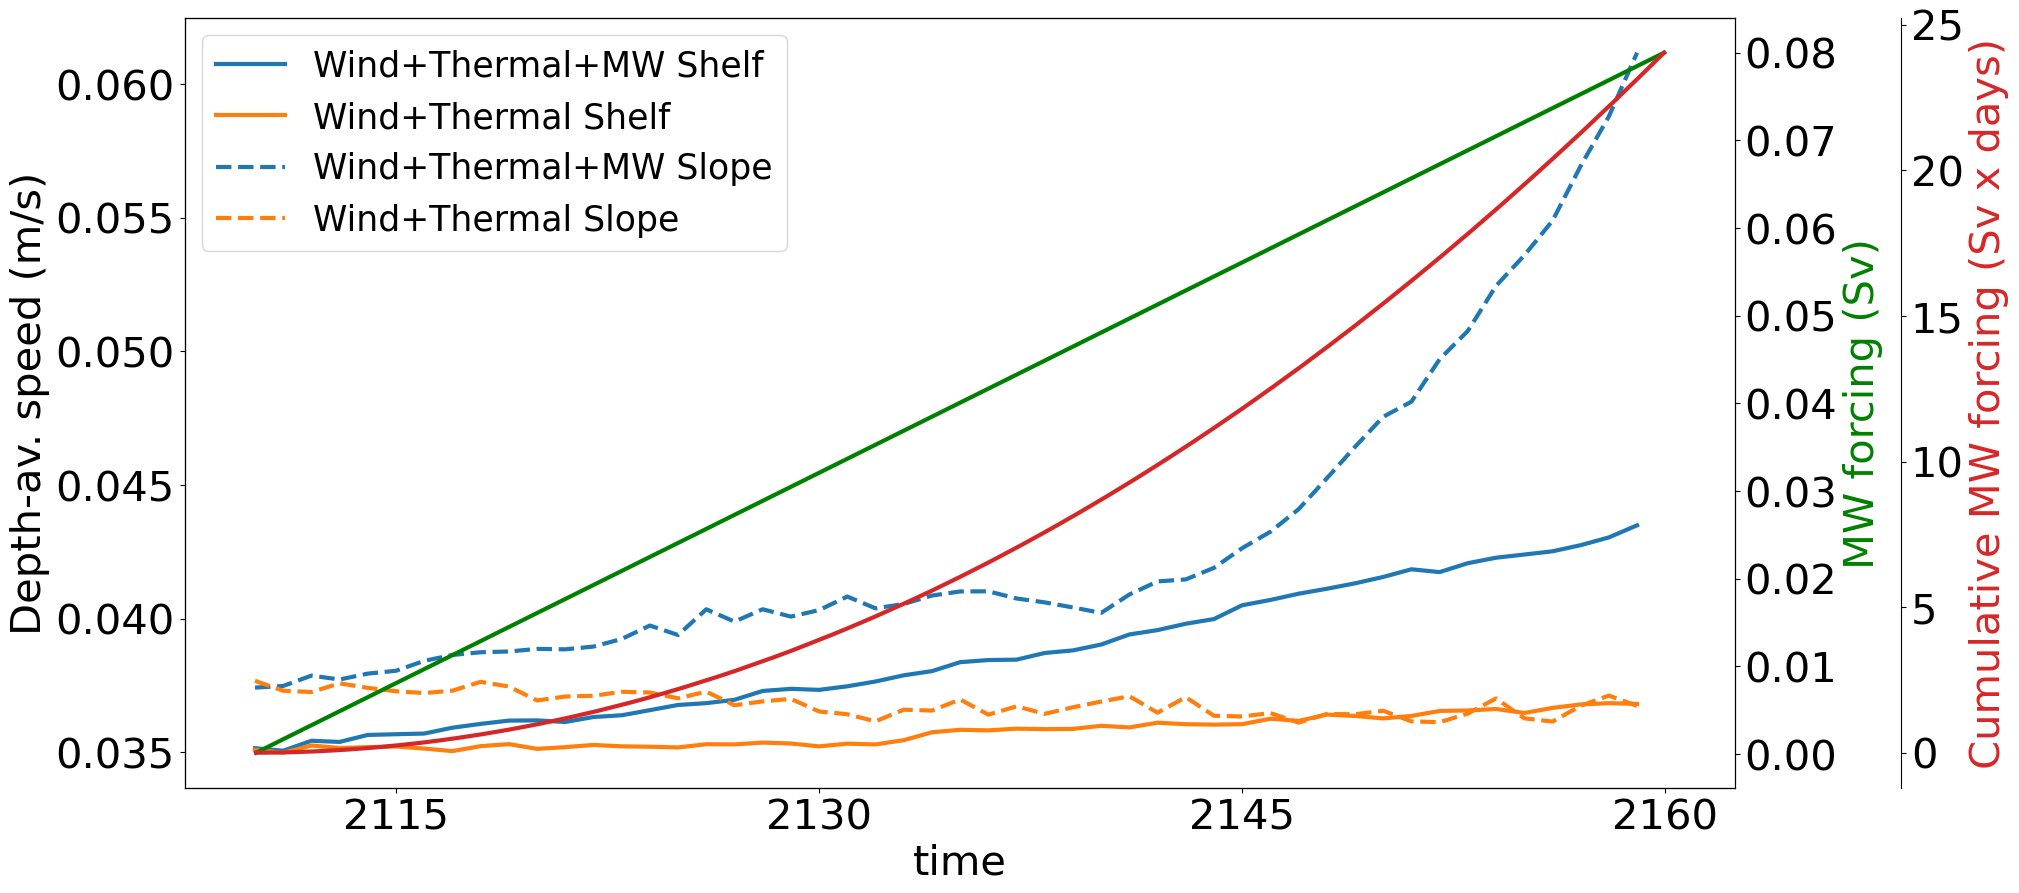

In [48]:
fig, ax = plt.subplots(figsize = (20,10))
weighted_temporal_mean(speed_depthav_wthmp_t_shelf).plot( label = 'Wind+Thermal+MW Shelf', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t_shelf).plot(label = 'Wind+Thermal Shelf', lw =3)
weighted_temporal_mean(speed_depthav_wthmp_t_slope).plot( label = 'Wind+Thermal+MW Slope', linestyle = 'dashed', color = 'C0', lw =3)
weighted_temporal_mean(speed_depthav_wthp_t_slope).plot(label = 'Wind+Thermal Slope', linestyle = 'dashed', color = 'C1', lw =3)
plt.ylabel('Depth-av. speed (m/s)')
plt.legend()

ax2 = ax.twinx()
ax2.plot(speed_depthav_wthmp_t_shelf.time, y_MW_ant, label = 'MW forcing (Sv)', color = 'g', lw = 3)
ax2.set_ylabel('MW forcing (Sv)',color = 'g')

ax3 = ax.twinx()
ax3.spines['right'].set_position(('outward', 120))
ax3.plot(speed_depthav_wthmp_t_shelf.time, np.cumsum(y_MW_ant), label = 'Cumulative MW forcing (Sv)', color = 'C3', lw = 3)
ax3.set_ylabel('Cumulative MW forcing (Sv x days)',color = 'C3')

#plt.ylim([0,0.17])

In [ ]:
#speed_depthav_wthmp_t_shelf.to_netcdf('speed_depthav_wthmp_t_shelf.nc')
#speed_depthav_wthp_t_shelf.to_netcdf('speed_depthav_wthp_t_shelf.nc')
speed_depthav_ryf_t_shelf.to_netcdf('speed_depthav_ryf_t_shelf.nc')